## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [3]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output_layer")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [20]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = lr, nesterov = True, momentum = MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
    
    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle = True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.8286 - acc: 0.3452 - val_loss: 1.6569 - val_acc: 0.4119
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6028 - acc: 0.4321 - val_loss: 1.6515 - val_acc: 0.4140
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5058 - acc: 0.4643 - val_loss: 1.5332 - val_acc: 0.4475
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4495 - acc: 0.4846 - val_loss: 1.5001 - val_acc: 0.4633
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.3998 - acc: 0.5058 - val_loss: 1.4952 - val_acc: 0.4697
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.3671 - acc: 0.5156 - val_loss: 1.4429 - val_acc: 0.4762
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3242 - acc: 0.5307 - val_loss: 1.4608 - val_acc

50000/50000 [==============================] - 2s 40us/step - loss: 1.8151 - acc: 0.3646 - val_loss: 1.7682 - val_acc: 0.3786
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7310 - acc: 0.3930 - val_loss: 1.6992 - val_acc: 0.4069
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6729 - acc: 0.4150 - val_loss: 1.6515 - val_acc: 0.4191
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6238 - acc: 0.4327 - val_loss: 1.6155 - val_acc: 0.4309
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5840 - acc: 0.4441 - val_loss: 1.5798 - val_acc: 0.4445
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5484 - acc: 0.4578 - val_loss: 1.5566 - val_acc: 0.4539
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5189 - acc: 0.4678 - val_loss: 1.5373 - val_acc: 0.4593
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.9882 - acc: 0.3060 - val_loss: 1.9668 - val_acc: 0.3134
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.9450 - acc: 0.3224 - val_loss: 1.9291 - val_acc: 0.3298
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9107 - acc: 0.3348 - val_loss: 1.8986 - val_acc: 0.3388
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.8829 - acc: 0.3449 - val_loss: 1.8748 - val_acc: 0.3443
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8601 - acc: 0.3523 - val_loss: 1.8551 - val_acc: 0.3543
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8415 - acc: 0.3579 - val_loss: 1.8378 - val_acc: 0.3588
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8252 - acc: 0.3653 - val_loss: 1.8222 - val_acc: 0.3666
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 2s 40us/step - loss: 2.2397 - acc: 0.1858 - val_loss: 2.2305 - val_acc: 0.1958
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2281 - acc: 0.1959 - val_loss: 2.2196 - val_acc: 0.2066
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.2172 - acc: 0.2052 - val_loss: 2.2089 - val_acc: 0.2142
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2066 - acc: 0.2149 - val_loss: 2.1987 - val_acc: 0.2239
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1964 - acc: 0.2227 - val_loss: 2.1887 - val_acc: 0.2341
Epoch 10/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1863 - acc: 0.2328 - val_loss: 2.1788 - val_acc: 0.2417
Epoch 11/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1765 - acc: 0.2401 - val_loss: 2.1691 - val_acc: 0.2477
Epoch 12/50
50000/50000 [=========================

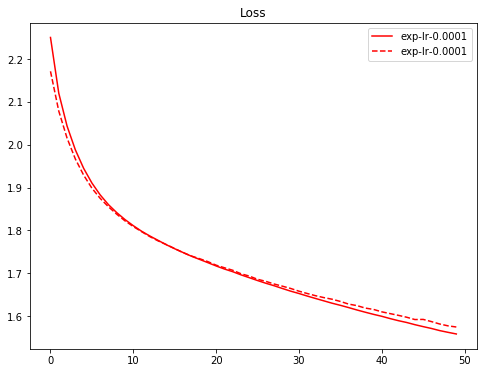

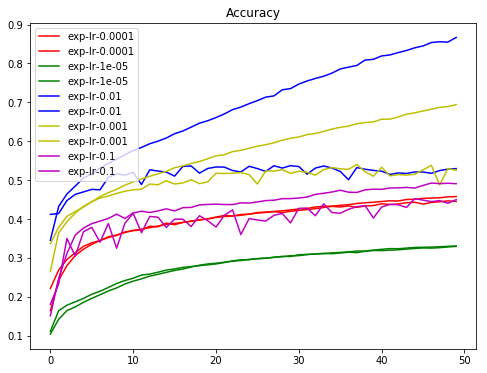

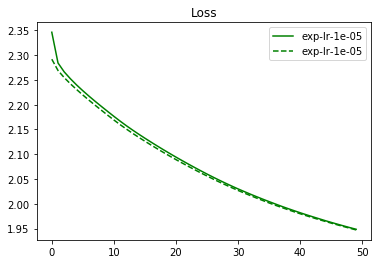

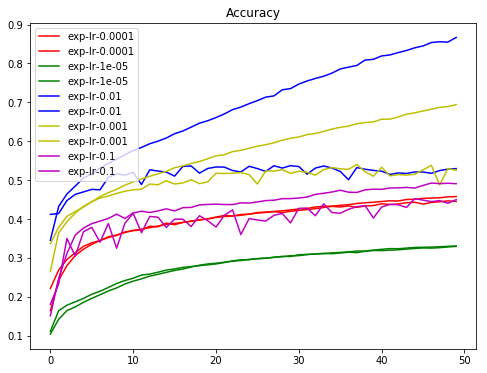

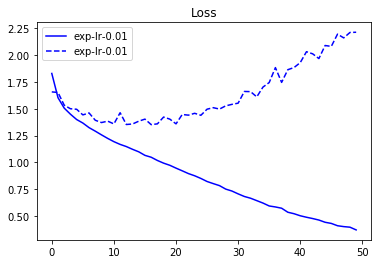

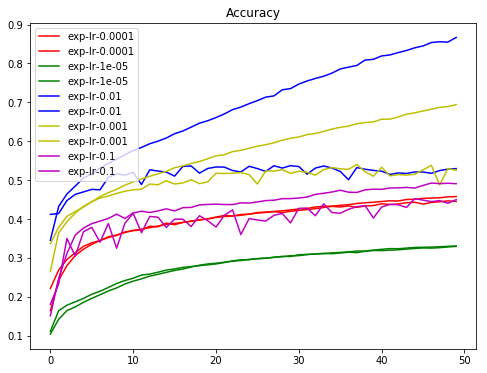

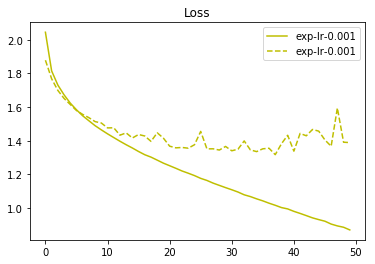

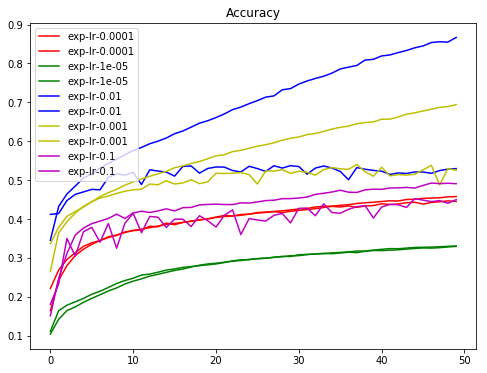

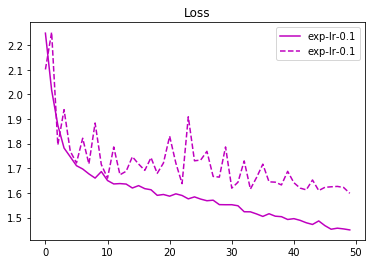

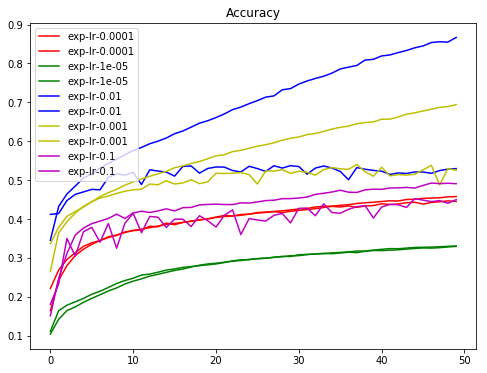

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label = cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '-', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

In [23]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [24]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = lr, nesterov = True, momentum = MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
    
    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle = True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.9150 - acc: 0.3143 - val_loss: 1.7904 - val_acc: 0.3605
Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7269 - acc: 0.3885 - val_loss: 1.6521 - val_acc: 0.4138
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6328 - acc: 0.4245 - val_loss: 1.6834 - val_acc: 0.3922
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5778 - acc: 0.4409 - val_loss: 1.6287 - val_acc: 0.4126
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5280 - acc: 0.4594 - val_loss: 1.5850 - val_acc: 0.4310
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4838 - acc: 0.4769 - val_loss: 1.4816 - val_acc: 0.4696
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4538 - acc: 0.4873 - val_loss: 1.5244 - val_acc

50000/50000 [==============================] - 2s 41us/step - loss: 1.9753 - acc: 0.3014 - val_loss: 1.9253 - val_acc: 0.3260
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8915 - acc: 0.3358 - val_loss: 1.8623 - val_acc: 0.3435
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.8398 - acc: 0.3546 - val_loss: 1.8216 - val_acc: 0.3625
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8018 - acc: 0.3680 - val_loss: 1.7844 - val_acc: 0.3786
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7708 - acc: 0.3788 - val_loss: 1.7549 - val_acc: 0.3888
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7445 - acc: 0.3880 - val_loss: 1.7318 - val_acc: 0.3965
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7217 - acc: 0.3968 - val_loss: 1.7147 - val_acc: 0.3985
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.1658 - acc: 0.2397 - val_loss: 2.1537 - val_acc: 0.2486
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.1372 - acc: 0.2531 - val_loss: 2.1269 - val_acc: 0.2611
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.1118 - acc: 0.2650 - val_loss: 2.1027 - val_acc: 0.2723
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0882 - acc: 0.2735 - val_loss: 2.0794 - val_acc: 0.2794
Epoch 8/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.0656 - acc: 0.2811 - val_loss: 2.0583 - val_acc: 0.2879
Epoch 9/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0452 - acc: 0.2878 - val_loss: 2.0387 - val_acc: 0.2922
Epoch 10/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.0263 - acc: 0.2949 - val_loss: 2.0206 - val_acc: 0.2973
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 2s 40us/step - loss: 2.2808 - acc: 0.1532 - val_loss: 2.2783 - val_acc: 0.1529
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2745 - acc: 0.1585 - val_loss: 2.2722 - val_acc: 0.1599
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2685 - acc: 0.1643 - val_loss: 2.2663 - val_acc: 0.1664
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2628 - acc: 0.1700 - val_loss: 2.2607 - val_acc: 0.1717
Epoch 9/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2573 - acc: 0.1752 - val_loss: 2.2553 - val_acc: 0.1749
Epoch 10/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2520 - acc: 0.1797 - val_loss: 2.2500 - val_acc: 0.1810
Epoch 11/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2468 - acc: 0.1853 - val_loss: 2.2449 - val_acc: 0.1848
Epoch 12/50
50000/50000 [=========================

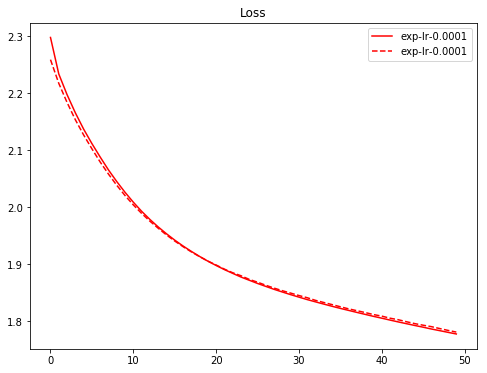

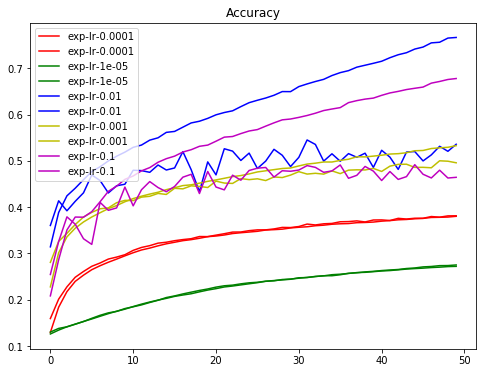

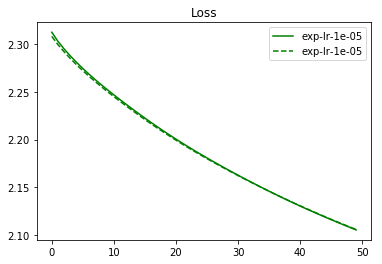

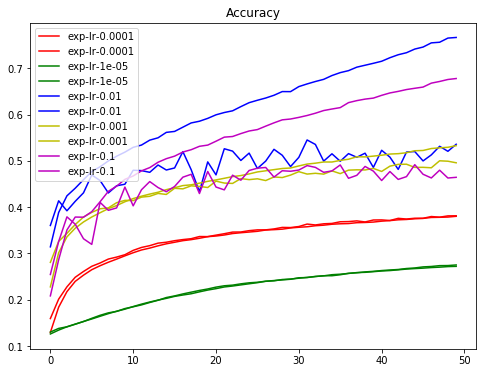

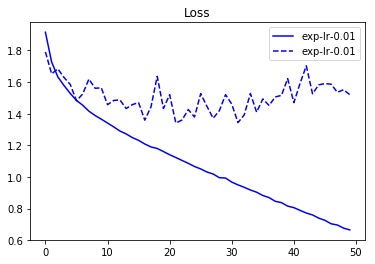

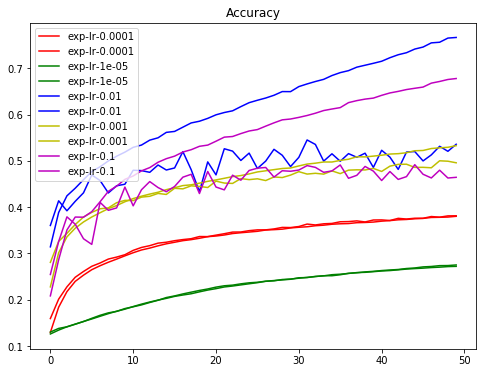

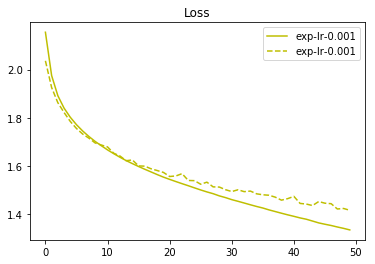

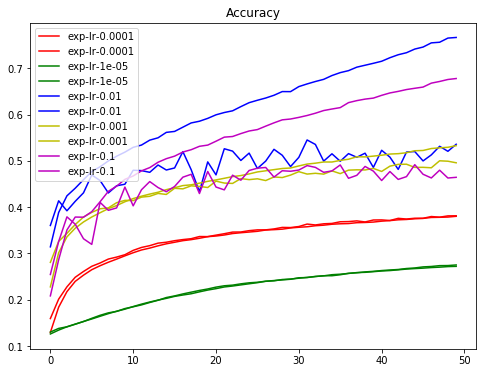

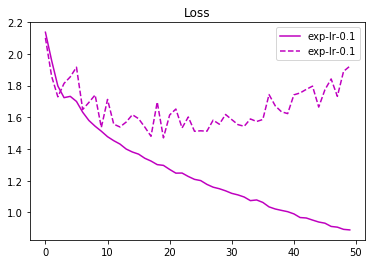

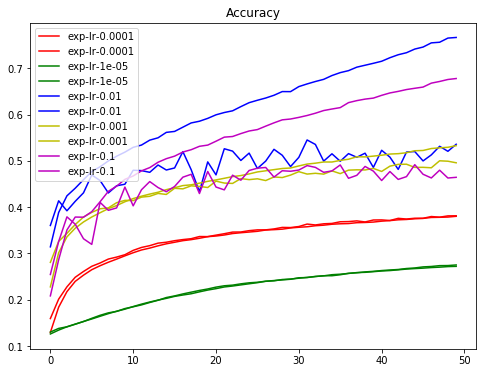

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label = cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '-', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

In [26]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9

In [27]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = lr, nesterov = True, momentum = MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
    
    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle = True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.8541 - acc: 0.3396 - val_loss: 1.7256 - val_acc: 0.3918
Epoch 2/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6410 - acc: 0.4204 - val_loss: 1.7140 - val_acc: 0.3996
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5541 - acc: 0.4498 - val_loss: 1.6290 - val_acc: 0.4120
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4900 - acc: 0.4729 - val_loss: 1.4903 - val_acc: 0.4693
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4433 - acc: 0.4900 - val_loss: 1.4803 - val_acc: 0.4737
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3992 - acc: 0.5045 - val_loss: 1.4604 - val_acc: 0.4768
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3620 - acc: 0.5160 - val_loss: 1.5164 - val_acc

50000/50000 [==============================] - 2s 41us/step - loss: 1.8821 - acc: 0.3406 - val_loss: 1.8380 - val_acc: 0.3558
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.8026 - acc: 0.3701 - val_loss: 1.7797 - val_acc: 0.3823
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7513 - acc: 0.3874 - val_loss: 1.7347 - val_acc: 0.3939
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7122 - acc: 0.4018 - val_loss: 1.6964 - val_acc: 0.4102
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6784 - acc: 0.4127 - val_loss: 1.6726 - val_acc: 0.4138
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6505 - acc: 0.4225 - val_loss: 1.6447 - val_acc: 0.4221
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6253 - acc: 0.4320 - val_loss: 1.6201 - val_acc: 0.4321
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.0439 - acc: 0.2761 - val_loss: 2.0221 - val_acc: 0.2879
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.0111 - acc: 0.2901 - val_loss: 1.9926 - val_acc: 0.3009
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9835 - acc: 0.3001 - val_loss: 1.9677 - val_acc: 0.3158
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.9597 - acc: 0.3111 - val_loss: 1.9464 - val_acc: 0.3280
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.9394 - acc: 0.3207 - val_loss: 1.9279 - val_acc: 0.3300
Epoch 9/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9214 - acc: 0.3287 - val_loss: 1.9122 - val_acc: 0.3404
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.9055 - acc: 0.3341 - val_loss: 1.8969 - val_acc: 0.3432
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 2s 41us/step - loss: 2.2710 - acc: 0.1630 - val_loss: 2.2666 - val_acc: 0.1696
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2626 - acc: 0.1703 - val_loss: 2.2587 - val_acc: 0.1743
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2549 - acc: 0.1766 - val_loss: 2.2514 - val_acc: 0.1792
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2478 - acc: 0.1818 - val_loss: 2.2447 - val_acc: 0.1850
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2411 - acc: 0.1865 - val_loss: 2.2382 - val_acc: 0.1900
Epoch 10/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2347 - acc: 0.1905 - val_loss: 2.2320 - val_acc: 0.1923
Epoch 11/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2285 - acc: 0.1948 - val_loss: 2.2261 - val_acc: 0.1963
Epoch 12/50
50000/50000 [=========================

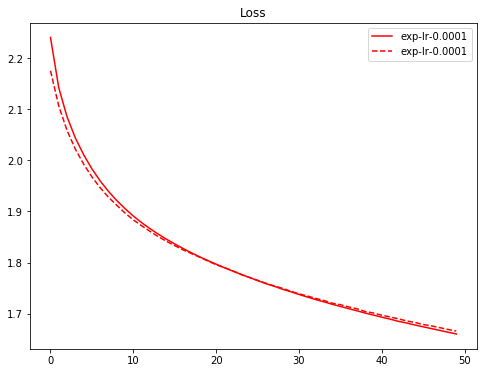

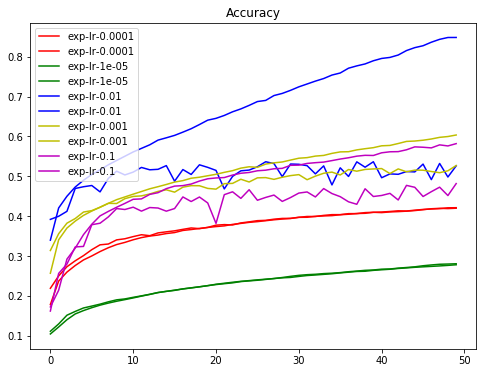

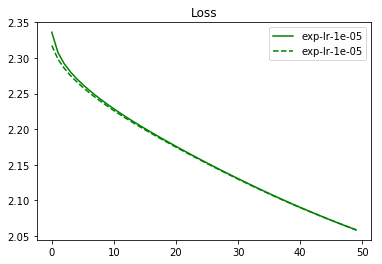

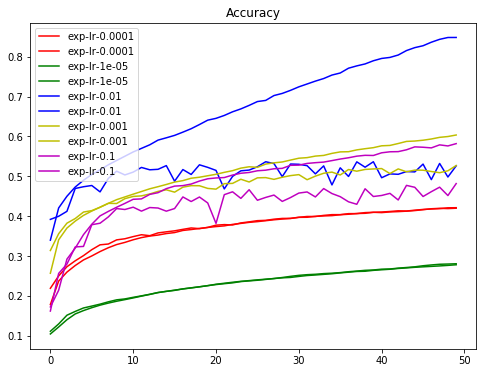

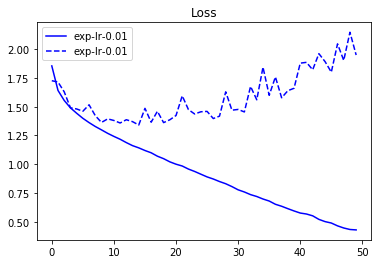

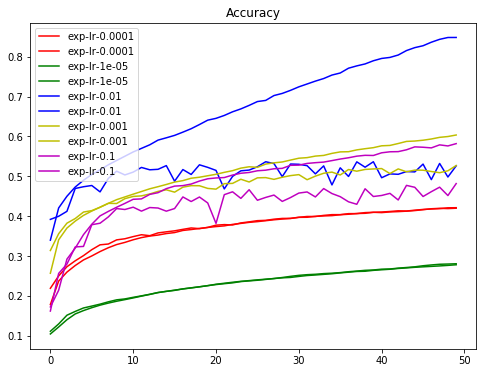

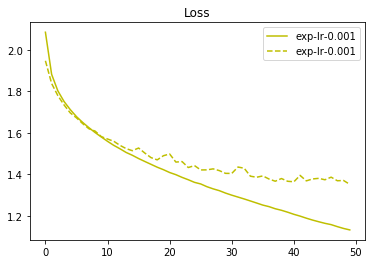

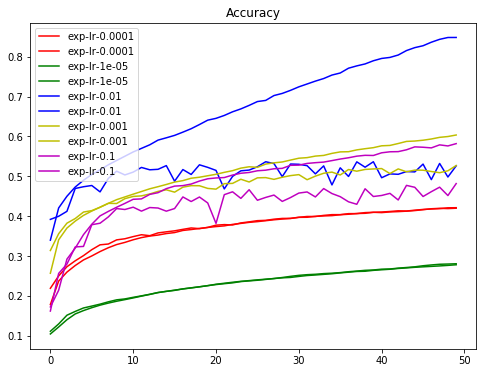

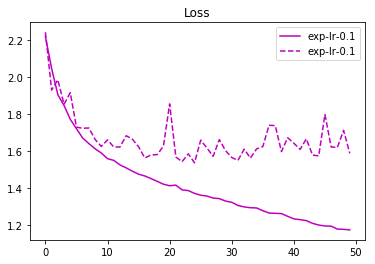

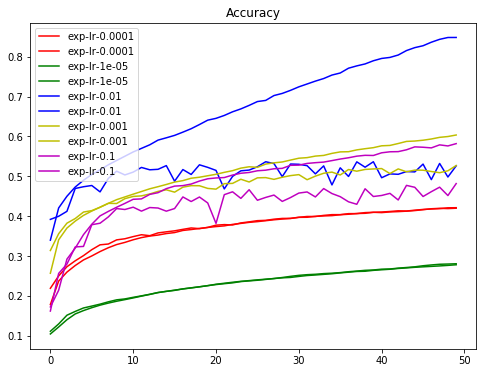

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label = cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '-', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()